In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import  preprocessing
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(tf.config.list_physical_devices('GPU'))

Num GPUs Available:  1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [22]:
def plot_acc(history, title="Model Accuracy"):
    """Imprime una gráfica mostrando la accuracy por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
def plot_loss(history, title="Model Loss", range=[0,0.001]):
    """Imprime una gráfica mostrando la pérdida por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.ylim(range[0], range[1])
    plt.legend(['Train', 'Val'], loc='upper right')
    plt.show()

In [4]:
mainpath="../NSL-KDD/"
transformed_datasets_folder = "transformed_datasets/"
file_normal_traffic = "normal_traffic.csv"
file_anomaly_traffic = "anomaly_traffic.csv"

csv_normal_traffic_path = mainpath + transformed_datasets_folder + file_normal_traffic
csv_anomaly_traffic_path = mainpath + transformed_datasets_folder + file_anomaly_traffic

In [5]:
df_normal_traffic = pd.read_csv(csv_normal_traffic_path)
df_normal_traffic.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,1,20,9,491.0,0.0,0,0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0.0,2,44,9,146.0,0.0,0,0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0.0,1,24,9,232.0,8153.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
3,0.0,1,24,9,199.0,420.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
4,0.0,1,24,9,287.0,2251.0,0,0.0,0.0,0.0,...,219.0,1.00,0.00,0.12,0.03,0.00,0.00,0.00,0.00,0


In [6]:
df_anomaly_traffic = pd.read_csv(csv_anomaly_traffic_path)
df_anomaly_traffic.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,1,49,5,0.0,0.0,0,0.0,0.0,0.0,...,26.0,0.10,0.05,0.0,0.0,1.0,1.0,0.0,0.0,1
1,0.0,1,49,1,0.0,0.0,0,0.0,0.0,0.0,...,19.0,0.07,0.07,0.0,0.0,0.0,0.0,1.0,1.0,1
2,0.0,1,49,5,0.0,0.0,0,0.0,0.0,0.0,...,9.0,0.04,0.05,0.0,0.0,1.0,1.0,0.0,0.0,1
3,0.0,1,49,5,0.0,0.0,0,0.0,0.0,0.0,...,15.0,0.06,0.07,0.0,0.0,1.0,1.0,0.0,0.0,1
4,0.0,1,51,5,0.0,0.0,0,0.0,0.0,0.0,...,23.0,0.09,0.05,0.0,0.0,1.0,1.0,0.0,0.0,1


In [7]:
np_array = df_normal_traffic.to_numpy()
class_label = np_array[:, -1] # for last column
data = np_array[:, :-1] # for all but last column

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, class_label, test_size=0.1, random_state=42)
print(len(data))
print(len(X_train))

77054
69348


In [9]:
# 0,9*0,23 = 0,207
X_train, X_val, _, _  = train_test_split(X_train, y_train, test_size=0.23, random_state=42)
print(len(X_val))
print(len(X_train))

15951
53397


In [10]:
X_train = preprocessing.normalize(X_train,norm='l2')
X_test = preprocessing.normalize(X_test,norm='l2')
X_val = preprocessing.normalize(X_val,norm='l2')

In [11]:
# Parametros de la red
batch_size = 64
epochs = 50
encoder_layer_1 = 25
encoder_layer_2 = 8
latent_layer = 3
decoder_layer_1 = encoder_layer_1
decoder_layer_2 = encoder_layer_2
data_dimention = data.shape[1]
activation_type = "relu"
kernel_init = "glorot_uniform"
patience = 5
regularization_parameter = 0.0001
dropout_parameter = 0.4

In [12]:
model = Sequential([
    Dense(encoder_layer_1, input_dim=data_dimention, activation=activation_type),
    Dense(latent_layer, activation=activation_type),
    Dense(decoder_layer_1, activation=activation_type),
    Dense(data_dimention)
])

In [13]:
model.compile(loss='mean_squared_error', optimizer="adam")

In [14]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=patience)

In [15]:
history = model.fit(X_train, X_train, 
              epochs=epochs, 
              validation_data=(X_val, X_val),
              batch_size=batch_size,
              callbacks=[es]
          )

Epoch 1/50
835/835 [==============================] - 11s 9ms/step - loss: 0.0033 - val_loss: 9.2741e-04
Epoch 2/50
835/835 [==============================] - 8s 10ms/step - loss: 8.2851e-04 - val_loss: 6.5086e-04
Epoch 3/50
835/835 [==============================] - 9s 10ms/step - loss: 6.1812e-04 - val_loss: 5.1117e-04
Epoch 4/50
835/835 [==============================] - 7s 9ms/step - loss: 5.0807e-04 - val_loss: 4.2423e-04
Epoch 5/50
835/835 [==============================] - 9s 11ms/step - loss: 4.4202e-04 - val_loss: 3.8309e-04
Epoch 6/50
835/835 [==============================] - 8s 9ms/step - loss: 4.0369e-04 - val_loss: 3.6223e-04
Epoch 7/50
835/835 [==============================] - 8s 9ms/step - loss: 3.7378e-04 - val_loss: 3.2319e-04
Epoch 8/50
835/835 [==============================] - 9s 11ms/step - loss: 3.4775e-04 - val_loss: 2.9686e-04
Epoch 9/50
835/835 [==============================] - 8s 9ms/step - loss: 3.2362e-04 - val_loss: 2.7801e-04
Epoch 10/50
835/835 [======

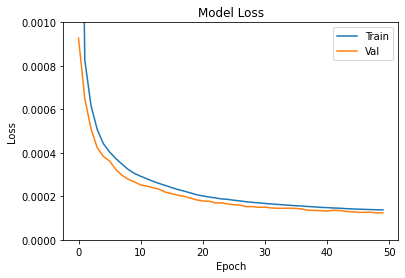

In [24]:
plot_loss(history)

In [17]:
np_anomaly_array = df_anomaly_traffic.to_numpy()
X_anomaly = np_anomaly_array[:, :-1] # for all but last column

In [18]:
pred = model.predict(X_test)
score1 = np.sqrt(mean_squared_error(pred,X_test))
pred = model.predict(X_train)
score2 = np.sqrt(mean_squared_error(pred,X_train))
pred = model.predict(X_anomaly)
score3 = np.sqrt(mean_squared_error(pred,X_anomaly))
print(f"Out of Sample Normal Score (RMSE): {score1}")
print(f"Insample Normal Score (RMSE): {score2}")
print(f"Attack Underway Score (RMSE): {score3}")

Out of Sample Normal Score (RMSE): 0.011730276051817801
Insample Normal Score (RMSE): 0.011610893652722037
Attack Underway Score (RMSE): 1642078.2323202065
